## Data Augmentation

Data augmentation is a technique used to artificially increase the size of a training dataset by creating modified copies of existing data. In the context of images, this can involve transformations like rotation, flipping, cropping, and color adjustments. This helps in making the model more robust and prevents overfitting.

In [48]:
import torch
import torchvision
import requests
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

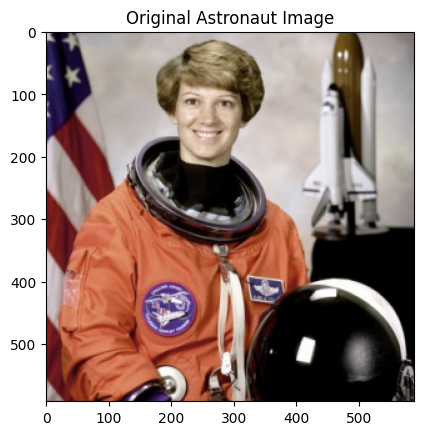

In [8]:
# --- Image Loading ---
# We load an image of an astronaut from a local file.
# This image will be used to demonstrate various data augmentation techniques.

""" TODO: Load an image of an astronaut from a local file.
Show the image using matplotlib to verify it has been loaded correctly.
"""
# Load an image of an astronaut
astronaut_image = Image.open("/content/Astronaut Image.png")

# Show the image using matplotlib
plt.imshow(astronaut_image)
plt.title("Original Astronaut Image")
plt.show()

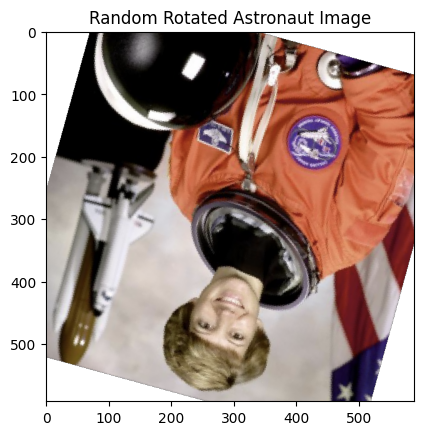

In [13]:
# 1. Random Rotation
# `transforms.RandomRotation` rotates the image by a random angle.
# Here, the angle is chosen from the range (-30, 90) degrees.
"""
TODO: Apply a random rotation to the astronaut image.
Display the rotated image.
"""

random_rotated_image = transforms.RandomRotation((0, 180))(astronaut_image)
plt.imshow(random_rotated_image)
plt.title("Random Rotated Astronaut Image")
plt.show()

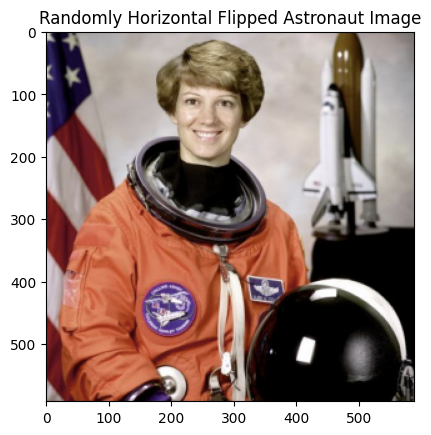

In [30]:
# 2. Random Horizontal Flip
# `transforms.RandomHorizontalFlip` flips the image horizontally with a given probability.
# `p=0.5` means there is a 50% chance the image will be flipped.
"""
TODO: Apply a random horizontal flip to the astronaut image.
Display the flipped image."""

horizontal_flipper = transforms.RandomHorizontalFlip(p=0.5)(astronaut_image)
plt.imshow(horizontal_flipper)
plt.title("Randomly Horizontal Flipped Astronaut Image")
plt.show()

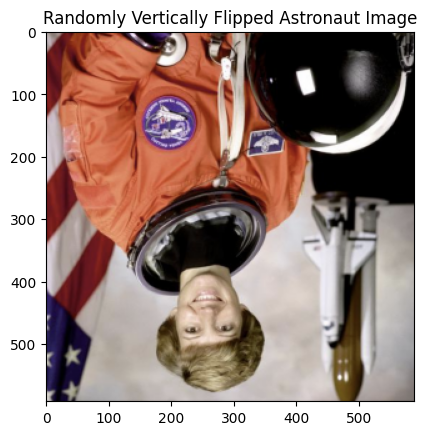

In [22]:
# 2_extra. Random Vertical Flip
# Similar to horizontal flip, `transforms.RandomVerticalFlip` flips the image vertically.
# `p=0.5` gives a 50% probability of a vertical flip.
"""
TODO: Apply a random vertical flip to the astronaut image.
Display the vertically flipped image.
"""
vertical_flipper = transforms.RandomVerticalFlip(p=0.5)(astronaut_image)
plt.imshow(vertical_flipper)
plt.title("Randomly Vertically Flipped Astronaut Image")
plt.show()

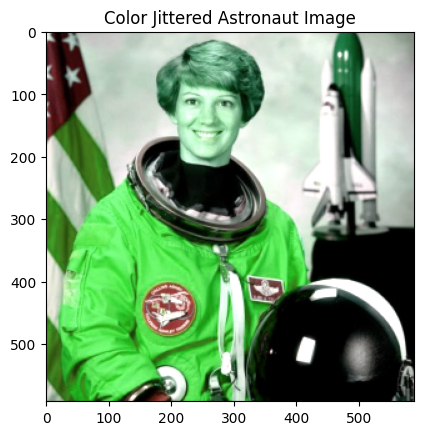

In [23]:
# 4. Color Jitter
# `transforms.ColorJitter` randomly changes the brightness, and hue of an image.
#  Brightness will be chosen uniformly at random from the range [1 - 0.5, 1 + 0.5] = [0.5, 1.5]
#  Hue will be chosen uniformly at random from the range [-0.3, 0.3].
"""
TODO: Apply color jitter to the astronaut image.
Display the color-jittered image.
"""
color_jitter = transforms.ColorJitter(brightness=0.5, hue=0.3)(astronaut_image)
plt.imshow(color_jitter)
plt.title("Color Jittered Astronaut Image")
plt.show()

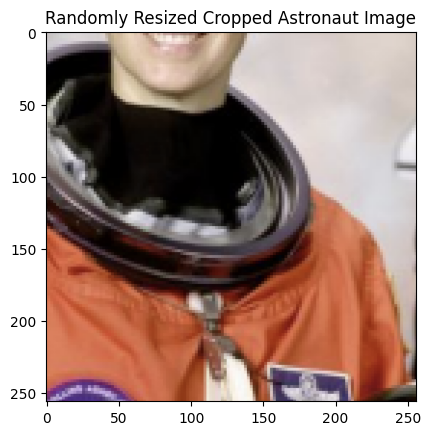

In [29]:
# 5. Random Cropping
# `transforms.RandomResizedCrop` crops the image to a random size and aspect ratio, then resizes it to the given size.
# This is a very common augmentation technique.
"""
TODO: Apply random resized cropping to the astronaut image.
Display the cropped image.
"""
random_resized_crop = transforms.RandomCrop(size=(256, 256))(astronaut_image)
plt.imshow(random_resized_crop)
plt.title("Randomly Resized Cropped Astronaut Image")
plt.show()

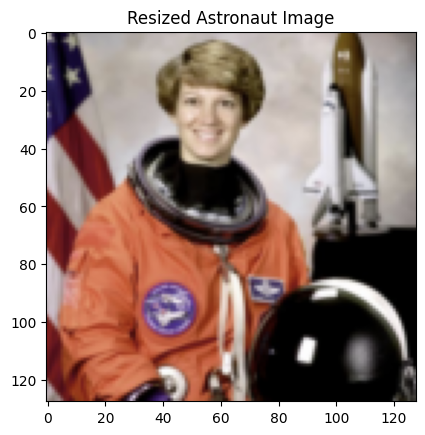

In [31]:
# 6_0. Image Resizing
# `transforms.Resize` resizes the input image to a given size.
# Here, we resize the image to 128x128 pixels.
"""
TODO: Resize the astronaut image to 128x128 pixels.
Display the resized image.
"""
resized_image = transforms.Resize((128, 128))(astronaut_image)
plt.imshow(resized_image)
plt.title("Resized Astronaut Image")
plt.show()

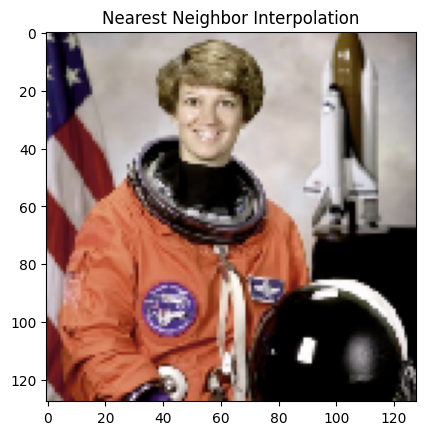

In [32]:
from torchvision.transforms import InterpolationMode

# Nearest neighbor (blocky, sharp edges)
resized = transforms.Resize((128, 128), interpolation=InterpolationMode.NEAREST)
plt.imshow(resized(astronaut_image))
plt.title("Nearest Neighbor Interpolation")
plt.show()


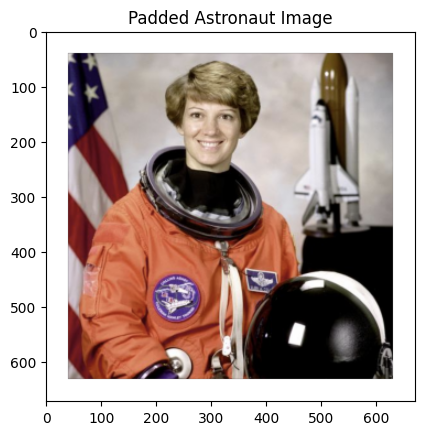

In [33]:
# 6_1. Image Padding
# `transforms.Pad` pads the image on all sides with a given padding value.
# Here, we add a padding of 40 pixels.
"""
TODO: Pad the astronaut image with 40 pixels on all sides.
Display the padded image.
"""
padded_image = transforms.Pad(40)(astronaut_image)
plt.imshow(padded_image)
plt.title("Padded Astronaut Image")
plt.show()

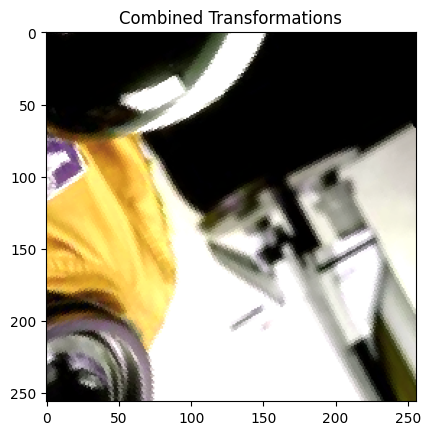

In [36]:
# 7. Combined Transformations
# `transforms.Compose` chains several transformations together.
# This is useful for creating a pipeline of augmentations.
# The final step is `transforms.ToTensor()` which converts the PIL image to a PyTorch tensor.
"""
TODO: Create a composed transform that includes random rotation, random horizontal flip,
random resized crop, color jitter, and conversion to tensor.
Apply this composed transform to the astronaut image and display the result.
"""
combined_transform = transforms.Compose([
    transforms.RandomRotation((0, 180)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomCrop(size=(256, 256)),
    transforms.ColorJitter(brightness=0.5, hue=0.3),
    transforms.ToTensor()
])

# The output is a tensor, which is not directly viewable with `plt.imshow` without permuting dimensions.
transformed_image_tensor = combined_transform(astronaut_image)

# Convert tensor back to numpy array for displaying
transformed_image_np = transformed_image_tensor.permute(1, 2, 0).numpy()
plt.imshow(transformed_image_np)
plt.title("Combined Transformations")
plt.show()

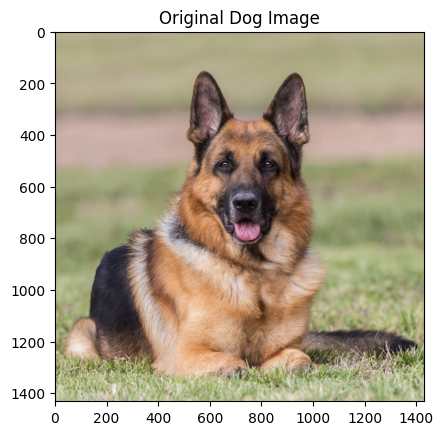

In [38]:
# --- Image Loading ---
# Load a new image of a dog. This will be used for Mixup and CutMix.
"""
TODO: Load an image of a dog from a local file.
Show the image to verify it has been loaded correctly.
"""
dog_image = Image.open("/content/Dog.png")
plt.imshow(dog_image)
plt.title("Original Dog Image")
plt.show()

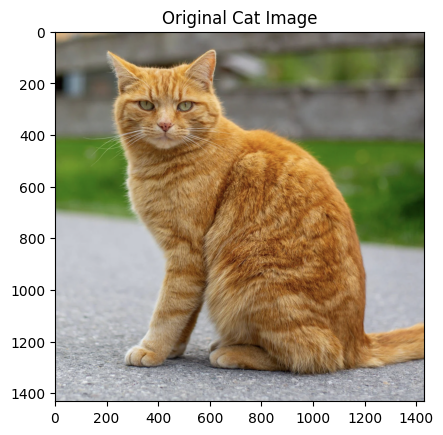

In [39]:
# Load an image of a cat. This will be mixed with the dog image.
"""
TODO: Load an image of a cat from a local file.
Show the image to verify it has been loaded correctly.
"""
cat_image = Image.open("/content/Cat.png")
plt.imshow(cat_image)
plt.title("Original Cat Image")
plt.show()

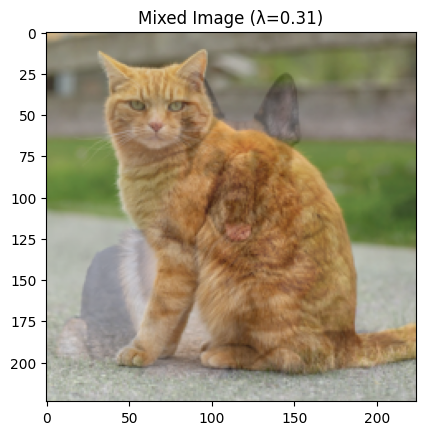

In [40]:
# --- Part 2: Mixup on the Dog and the Cat image ---
# Mixup is an augmentation technique that creates a new image by taking a weighted linear interpolation of two existing images.
# Resize images to be the same size for element-wise operations.
dog_image_resized = dog_image.resize((224, 224))
cat_image_resized = cat_image.resize((224, 224))

# Convert images to tensors.
to_tensor = transforms.ToTensor()
dog_tensor = to_tensor(dog_image_resized)
cat_tensor = to_tensor(cat_image_resized)

def mixup(image1_tensor, image2_tensor, alpha=1.0):
    """Applies Mixup augmentation to two image tensors."""
    # The mixing coefficient `lam` is sampled from a Beta distribution.
    lam = np.random.beta(alpha, alpha)
    # The new image is a linear combination of the two input images.
    mixed_image = lam * image1_tensor + (1 - lam) * image2_tensor
    return mixed_image, lam

mixed_image_tensor, mixup_lam = mixup(dog_tensor, cat_tensor)

# Convert the resulting tensor back to a PIL Image for visualization.
to_pil = transforms.ToPILImage()
mixed_image = to_pil(mixed_image_tensor)
plt.imshow(mixed_image)
plt.title(f"Mixed Image (λ={mixup_lam:.2f})")
plt.show()

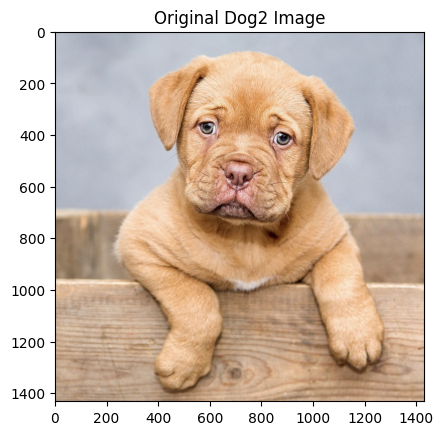

In [41]:
# --- Image Loading ---
# Load a second dog image for the CutMix demonstration.
"""
TODO: Load an image of a second dog from a local file.
Show the image to verify it has been loaded correctly.
"""
dog2_image = Image.open("/content/Dog2.png")
plt.imshow(dog2_image)
plt.title("Original Dog2 Image")
plt.show()

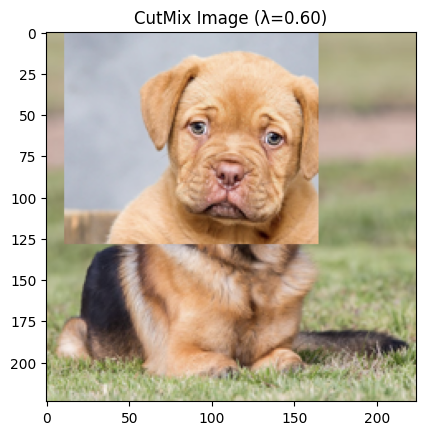

In [42]:
# --- Part 3: CutMix on the Dog and Dog2 image ---
# CutMix is another augmentation technique where a patch from one image is cut and pasted onto another.
# The labels are also mixed proportionally to the area of the patch.
dog2_image_resized = dog2_image.resize((224, 224))
dog2_tensor = to_tensor(dog2_image_resized)

def rand_bbox(size, lam):
    """Generates a random bounding box for CutMix."""
    W = size[1]
    H = size[2]
    cut_rat = np.sqrt(1. - lam)
    cut_w = int(W * cut_rat)
    cut_h = int(H * cut_rat)

    # Uniformly sample the center of the box
    cx = np.random.randint(W)
    cy = np.random.randint(H)

    # Calculate the coordinates of the bounding box.
    bbx1 = np.clip(cx - cut_w // 2, 0, W)
    bby1 = np.clip(cy - cut_h // 2, 0, H)
    bbx2 = np.clip(cx + cut_w // 2, 0, W)
    bby2 = np.clip(cy + cut_h // 2, 0, H)

    return bbx1, bby1, bbx2, bby2

def cutmix(image1_tensor, image2_tensor, alpha=1.0):
    """Applies CutMix augmentation to two image tensors."""
    # The mixing coefficient `lam` is sampled from a Beta distribution.
    lam = np.random.beta(alpha, alpha)
    # Clone the tensor to avoid modifying the original
    mixed_image = image1_tensor.clone()
    bbx1, bby1, bbx2, bby2 = rand_bbox(mixed_image.size(), lam)
    # Paste the patch from the second image onto the first one.
    mixed_image[:, bby1:bby2, bbx1:bbx2] = image2_tensor[:, bby1:bby2, bbx1:bbx2]

    # Adjust lambda to match the proportion of the patch.
    lam = 1 - ((bbx2 - bbx1) * (bby2 - bby1) / (mixed_image.size()[-1] * mixed_image.size()[-2]))
    return mixed_image, lam

cutmix_image_tensor, cutmix_lam = cutmix(dog_tensor, dog2_tensor)

# Visualize the mixed and cutmix images
cutmix_image = to_pil(cutmix_image_tensor)
plt.imshow(cutmix_image)
plt.title(f"CutMix Image (λ={cutmix_lam:.2f})")
plt.show()

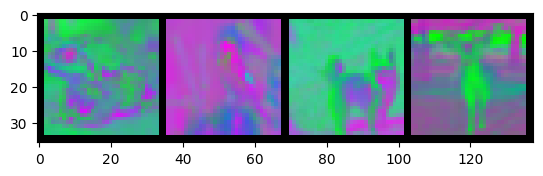

In [50]:
# Custom Channel Inversion transformation
class ChannelColorInversion(object):
    def __init__(self, channels=(0, 1, 2)):  # By default, inverts all channels (R, G, B)
        self.channels = channels

    def __call__(self, img):
        if isinstance(img, torch.Tensor):
            img = transforms.ToPILImage()(img)

        np_img = np.array(img)

        # Invert specified channels
        for channel in self.channels:
            np_img[..., channel] = 255 - np_img[..., channel]

        return Image.fromarray(np_img.astype('uint8'))

# Apply the custom transformation and load the dataset
transform = transforms.Compose([
    transforms.Resize((32, 32)),  # Resize the image
    ChannelColorInversion(channels=(0, 2)),  # Invert only the Red and Blue channels
    transforms.ToTensor(),  # Convert back to Tensor
])

# CIFAR-10 dataset with custom transformation
dataloader = DataLoader(datasets.CIFAR10(root='./data', train=True, download=True, transform=transform), batch_size=4, shuffle=True)

# Visualize the results
dataiter = iter(dataloader)
images, _ = next(dataiter)
plt.imshow(np.transpose(torchvision.utils.make_grid(images).numpy(), (1, 2, 0)))
plt.show()